## 符号说明
 $x_n x_{n-1} \ldots x_1 x_0$一个二进制数。其中 $x_n$ 是最高有效位，$x_0$ 是最低有效位

$a_i$ 被加数的第 $i$ 位

$c_i$ 第 $i$ 位的进位

$s_i$ 加和数的第 $i$ 位

## Ripple-Carry Adder 方法 ##

对 $x_n x_{n-1} \ldots x_1 x_0$，考虑进位传播：

1. 初始化进位 $c_0 = 0$（因为我们在加1）。
2. 对于每个位 $x_i$ 从0到n:
   - 计算和位 $s_i = x_i \oplus c_i \oplus a_i $。
   - 计算下一位置的进位位 $c_{i+1} = (x_i \land a_i) \lor (x_i \land c_i) \lor (a_i \land c_i)$。

带入 $a = 1$ ，即
$$
a_i=0,i\neq 0 \\
a_0 = 1
$$
与 $c_0=0$ 得到：
- 对于 $i =0, s_0 = x_0 \oplus 1, c_1  = x_0 $ 。
- 对于 $i \neq 0, s_i = x_i \oplus c_i , c_{i+1}  = x_i\land c_i $，因此 $s_i = x_i \oplus x_{i-1}\land \cdots x_0 , c_{i+1}  = x_i\land \cdots x_0 $ 。

## 示例 ##

考虑 $x = 0110_2$（即十进制中的6）：

1. 对于 $x_0 = 0$:
   - $s_0 = x_0 \oplus 1 = 0 \oplus 1 = 1$
   - $c_1 = x_0 = 0 $

2. 对于 $x_1 = 1$:
   - $s_1 = x_1 \oplus c_1 = 1 \oplus 0 = 1$
   - $c_2 = x_1 \land c_0 = 1 \land 0 = 0$

3. 对于 $x_2 = 1$:
   - $s_2 = x_2 \oplus c_2 = 1 \oplus 0 = 1$
   - $c_3 = x_2 \land c_2 = 1 \land 0 = 0$

4. 对于 $x_3 = 0$:
   - $s_3 = x_3 \oplus c_3 = 0 \oplus 0 = 0$
   - $c_4 = x_3 \land c_3 = 0 \land 0 = 0$

因此，$0110_2 + 1 = 0111_2$，即十进制中的7。

In [9]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

def qrw(qubit_num: int) -> QuantumCircuit:
    """
    Returns a QuantumCircuit that implements a quantum random walk with `qubit_num` qubits.
    In this function, the random walk is in a (2^qubit_num) cycle.

    Args:
        qubit_num (int): The number of qubits to use for the random walk. Must be greater than or equal to 2.

    Raises:
        ValueError: If `qubit_num` is less than 2.

    Returns:
        QuantumCircuit: A QuantumCircuit object that implements the quantum random walk with the specified number of qubits.
    """
    if qubit_num < 2:
        raise ValueError("qubit not enough")
    
    walk_space = QuantumRegister(qubit_num, 'node')
    c_reg = ClassicalRegister(qubit_num,'measure')
    coin_qubit = QuantumRegister(1, 'coin')
    
    qrw_qc = QuantumCircuit(walk_space, coin_qubit, c_reg)

    qrw_qc.h(coin_qubit)

    # Increment
    for i in range(qubit_num - 1,-1,-1):
        control_qubits = [coin_qubit[0]] + [walk_space[j] for j in range(i)]
        qrw_qc.mcx(control_qubits, walk_space[i])

    # Decrement
    qrw_qc.x(walk_space[:qubit_num-1])
    qrw_qc.x(coin_qubit)
    for i in range(qubit_num - 1,-1,-1):
        control_qubits = [coin_qubit[0]] + [walk_space[j] for j in range(i)]
        qrw_qc.mcx(control_qubits, walk_space[i])
    qrw_qc.x(walk_space[:qubit_num-1])
    qrw_qc.x(coin_qubit)

    # Measurement
    for i in range(qubit_num):
        qrw_qc.measure(walk_space[i], c_reg[i])

    return qrw_qc


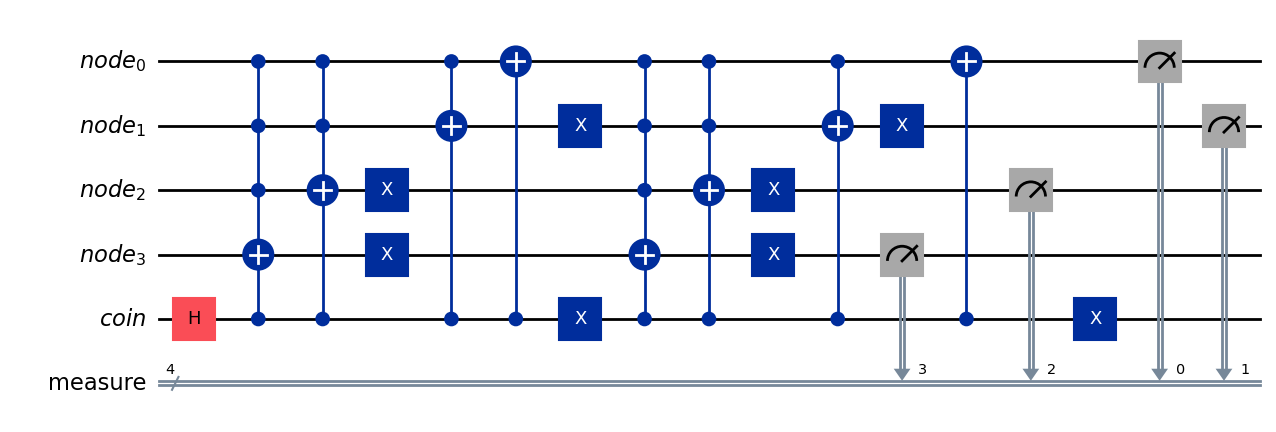

In [10]:

# Test the function
circuit = qrw(4)
circuit.draw(output="mpl")

In [11]:
from qiskit.primitives import Sampler
result = Sampler().run(qrw(5)).result()
result.quasi_dists

[{1: 0.999999999999998}]